In [500]:
import Plots , Flux , Statistics

In [61]:
# Generating a Dataset
X = trunc.(rand(250) * 500)
f(x) = @. x *3 + 45;
Y = f(X)
Y += randn(250) * 50

250-element Vector{Float64}:
 1149.3374954352716
  516.9162803697409
 1215.463509521573
  332.3989318864662
  415.7631489762478
  730.7296642909793
  489.9318445353357
 1355.6930014945324
  644.866920144064
  856.0691296469187
    ⋮
  516.6114732362975
  140.62542672495675
  905.0550425723644
  186.62088294438018
  218.35977650379158
  980.3785729606944
  146.5514216214667
  230.2738690066019
  841.3454430026297

In [62]:
X |> size

(250,)

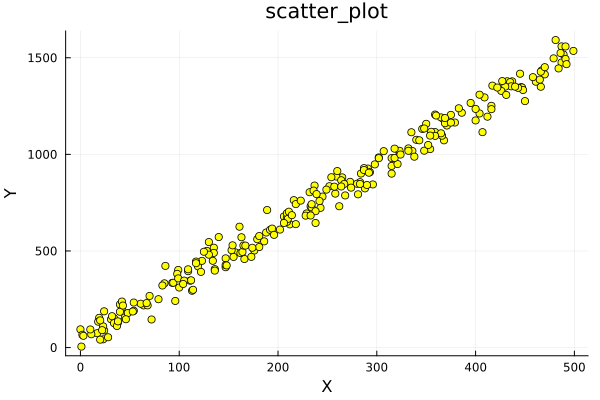

In [63]:
Plots.scatter(X,Y,color=:yellow,xlabel="X",ylabel="Y",
                title="scatter_plot",legend=false)

In [482]:
# Build a simple regressor
# The model needs to a loss function
MSE(y,ŷ) = sum((y .- ŷ).^2) / length(y)

function simple_regressor(X , Y , epochs , ŋ = 0.01)
    error = []
    len = length(Y)
    a0 , a1 = (0,0) # Coefficients
    for e in 1:epochs # Training loop
        # print("["*"="^(20 * e/epochs) *"] -> $(round((e*100/epochs),digits=2)) \r")
        Ŷ = a0 .+ a1 .* X # Predict Y
        # Update coefficients
        a0 = a0 -  (ŋ * 2 * sum((Y .- Ŷ)) / len )
        a1 = a1 -  (ŋ * 2 * sum((Y .- Ŷ) .* X) / len)
        append!(error,MSE(Y,Ŷ))
    end
    println("Done ☑ ")
    return a0 ,a1 , error
end


simple_regressor (generic function with 3 methods)

In [485]:
a0

-6.802551038560608e63

In [484]:
@show a0,a1,error = simple_regressor(X,Y,30,0.001)
Ŷ = a0 .+ a1 .* X

250-element Vector{Float64}:
 -8.1785734601899e68
 -2.9760740462158693e68
 -8.509240795823843e68
 -1.8738495941027274e68
 -3.240607914723023e68
 -5.136433972357628e68
 -2.9760740462158693e68
 -9.192619956133992e68
 -5.246656417568942e68
 -6.23865842447077e68
  ⋮
 -3.83580911886412e68
 -4.4095780635564247e67
 -6.437058825851135e68
 -1.1684259447503163e68
 -1.499093280384259e68
 -6.657503716273764e68
 -1.0141145214544764e68
 -1.4770487913419962e68
 -6.39296984776661e68

In [511]:
a0 , a1 = rand(Float32,1,2)
Ŷ = a0 .+ a1 .* X
a0 = a0 -  (0.01 * 2 * Statistics.mean((Y .- Ŷ)))
a1 = a1 -  (0.01 * 2 * Statistics.mean((Y .- Ŷ) .* X))
Ŷ = a0 .+ a1 .* X

250-element Vector{Float64}:
      -1.2481322449385964e6
 -454178.3887877672
      -1.2985954137617424e6
 -285967.8260439474
 -494548.9238462839
 -783871.0917656539
 -454178.3887877672
      -1.4028859626629106e6
 -800692.1480400359
 -952081.6545094737
       ⋮
 -585382.6277279466
  -67294.09447698174
 -982359.5558033612
 -178313.06588790278
 -228776.23471104872
      -1.0160016683521252e6
 -154763.58710376802
 -225412.02345617232
 -975631.1332936084

In [513]:
a0 , a1 = rand(Float32,1,2)

1×2 Matrix{Float32}:
 0.0972168  0.861685

In [518]:
@show X[1]
@show (a0,a1)





371.0

In [431]:
a1

-4.947488877653303e287

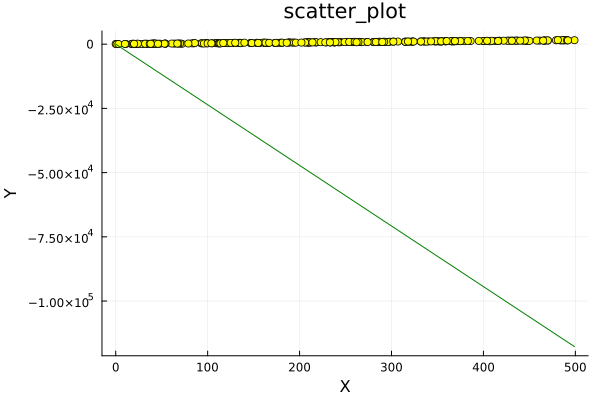

In [469]:


Plots.scatter(X,Y,color=:yellow,xlabel="X",ylabel="Y",
                title="scatter_plot",legend=false)

Plots.plot!(X,Ŷ,color = :green)


470832.869265547